Heigon Soldera 217638
Rafael Galib 204904

# Introdução

Para cada chute nos foi fornecido um arquivo .dat com leituras de 20 pontos representados
por suas coordenadas X, Y e Z. Para cada chute iremos encontrar uma regressão que descreva X em função de Y, para então encontrar uma regressão para Z em função de X e Y.
Em cada regressão iremos calcular a curva que melhor se ajusta aos dados tendo como referência os valores da função custo associada à descida de gradiente do polinômio a ser estimado.

# Regressão Linear Univariada

Para o cálculo de Y em função de X para cada chute, iremos utilizar do seguinte:

## Hipótese
## $h_{\theta}(y) = x = \theta_0 + \theta_1 y$


## Função de Custo 
## $J(\theta) = \frac{1}{2m} \sum^m_{i=1} (h_{\theta} - x)^2 $


## Derivadas  
## $ \frac{\partial}{\partial \theta_0} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} - x) \times 1 $ 
## $ \frac{\partial}{\partial \theta_1} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} - x) \times y $
  

## Atualização dos $\theta$ 
## $\theta_{0} := \theta_{0} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - x) \times 1 $ 
## $\theta_{1} := \theta_{1} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - x) \times y $

# Definição da função de regressão
Aqui utilizaremos todas as equações supracitadas para, ao retorno da função, termos os valores 
calculados pela função custo, assim como os novos valores de X a partir dos pontos Y da leitura, que nos servirão para calcular o MRS. Também iremos criar n valores para Y de forma a atribuir valores de X estimados para serem plotados.

In [139]:
def LinRegUni(t0A,t1A,alpha,m,X,Y,Jep):

    def h(t0,t1,y):     # Def da função hipótese
        x = t0 + t1*y 
        return x

    def Cost(t0,t1,X,Y,m):  #Def da função custo
        soma = 0
        for i in range(m):
            soma += (h(t0,t1,Y[i]) - X[i])**2
        value = (1/(2*m)) * soma
        return value

    jA = Cost(t0A,t1A,X,Y,m)

    listJ = [jA]
    delJ = Jep + 1
    
    while(delJ > Jep):  # Aqui iteramos os valores de theta até encontrarmos uma diferença pequena
                        #atribuida por argumento
        soma = 0
        for i in range(m):
            soma += (h(t0A,t1A, Y[i]) - X[i]) * 1
        t0N = t0A - (alpha/m) * soma
                                            # Calculos dos novos thetas
        soma = 0
        for i in range(m):
            soma += (h(t0A,t1A,Y[i]) - X[i]) * Y[i]
        t1N = t1A - (alpha/m) * soma

        jN = Cost(t0N,t1N,X,Y,m)
        listJ.append(jN)

        delJ= abs(jN - jA)
                                    
        t0A = t0N
        t1A = t1N
        jA = jN

    newX = []
    for i in range(m):  # Aqui calculamos novos valores de X com base nos Y da entrada
        newX.append(h(t0N,t1N,Y[i]))
    
    
    y = 2.1     # Aqui traçamos a partir do ponto do diagrama da atividade, n valores de Y e
                #calculamos seus respectivos X
    preX = []
    preY = []
    while(y>=0):
        preX.append(h(t0N,t1N,y))
        preY.append(y)
        y-= 0.05

    soma = 0
    for j in range(m):  # Calculo do MSR
        soma += (newX[j] - X[j])**2
    msr = soma/m
 
    return listJ,newX,preX,preY,msr

# Regressão Polinomial Univariada

Tal qual a linear, desta vez utilizaremos:

## Hipótese 
## $h_{\theta}(y) = x = \theta_0 + \theta_1 y + \theta_2 y^2$


## Função de Custo 
## $J(\theta) = \frac{1}{2m} \sum^m_{i=1} (h_{\theta} - x)^2 $


## Derivadas  
## $ \frac{\partial}{\partial \theta_0} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} - x) \times 1 $  
## $ \frac{\partial}{\partial \theta_1} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} - x) \times y $  
## $ \frac{\partial}{\partial \theta_2} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} - x) \times y^2 $


## Atualização dos $\theta$ 
## $\theta_{0} := \theta_{0} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - x) \times 1 $ 
## $\theta_{1} := \theta_{1} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - x) \times y $ 
## $\theta_{2} := \theta_{2} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - x) \times y^2 $
  

# Definição da função de regressão
O funcionamento é o mesmo da linear, porém, com as equações do modelo descrito logo acima.

In [140]:
def PolRegUni(t0A,t1A,t2A,alpha,m,X,Y,Jep):

    def h(t0,t1,t2,y):
        x = t0 + t1*y + t2*y**2
        return x

    def Cost(t0,t1,t2,X,Y,m):
        soma = 0
        for i in range(m):
            soma += (h(t0,t1,t2,Y[i]) - X[i])**2
        value = (1/(2*m)) * soma
        return value

    jA = Cost(t0A,t1A,t2A,X,Y,m)

    listJ = [jA]
    delJ = Jep +1

    while(delJ > Jep):

        soma = 0
        for i in range(m):
            soma += (h(t0A,t1A,t2A,Y[i]) - X[i]) * 1
        t0N = t0A - (alpha/m) * soma

        soma = 0
        for i in range(m):
            soma += (h(t0A,t1A,t2A,Y[i]) - X[i]) * Y[i]
        t1N = t1A - (alpha/m) * soma

        soma = 0
        for i in range(m):
            soma += (h(t0A,t1A,t2A,Y[i]) - X[i]) * Y[i]**2
        t2N = t2A - (alpha/m) * soma

        jN = Cost(t0N,t1N,t2N,X,Y,m)
        listJ.append(jN)

        delJ = abs(jN-jA)

        t0A = t0N
        t1A = t1N
        t2A = t2N
        jA = jN

    newX = []
    for i in range(m):
        newX.append(h(t0N,t1N,t2N,Y[i]))
    
    y = 2.1
    preX = []
    preY = []
    while(y>=0):
        preX.append(h(t0N,t1N,t2N,y))
        preY.append(y)
        y-= 0.05

    soma = 0
    for j in range(m):
        soma += (newX[j] - X[j])**2
    msr = soma/m
 
    return listJ,newX,preX,preY,msr

## Com isso, podemos estudar os comportamentos de X em Y para os dois chutes.

Importamos os módulos necessários

In [141]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np

Carregamos o primeiro chute e separamos seus valores

In [142]:
with open('kick1.dat') as f:
    lines = f.readlines()
    xyz = np.array([[float(line.split()[0]),float(line.split()[1]),float(line.split()[2])] for line in lines])

    X = xyz[:,0]
    Y = xyz[:,1]
    Z = xyz[:,2]

Calculamos polinomios através de distintos valores de alpha e imprimimos seus resultados.
O numero de alphas para a regressão polinomial é menor pois valores maiores do que 0.2 apresentaram overflow

Alpha = 0.05: MSR Lin= 0.001776, Iter= 2190
Alpha = 0.17: MSR Lin= 0.001165, Iter= 779
Alpha = 0.30: MSR Lin= 0.001063, Iter= 493
Alpha = 0.42: MSR Lin= 0.001020, Iter= 366
Alpha = 0.55: MSR Lin= 0.000997, Iter= 293


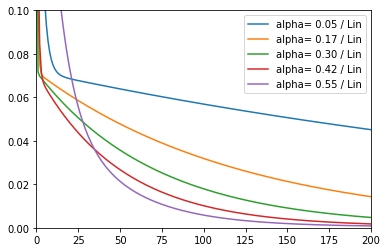

Alpha = 0.05: MSR Pol= 0.001489, Iter= 564
Alpha = 0.07: MSR Pol= 0.001437, Iter= 397
Alpha = 0.10: MSR Pol= 0.001411, Iter= 309
Alpha = 0.12: MSR Pol= 0.001393, Iter= 255
Alpha = 0.15: MSR Pol= 0.001383, Iter= 217


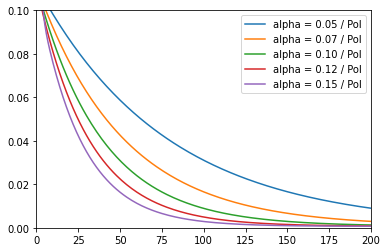

In [143]:
for alpha in np.linspace(0.05, 0.55, 5):
    listJ,newX_yLin,preX_yLin,preY_yLin,msr = LinRegUni(0,0,alpha,20,X,Y,10**(-6))

    print("Alpha = {:.2f}: MSR Lin= {:.6f}, Iter= {}".format(alpha, msr, len(listJ)))

    plt.plot(np.arange(len(listJ)), listJ, label= 'alpha= {:.2f} / Lin'.format(alpha))
    plt.legend()

plt.xlim(0, 200)
plt.ylim(0, 0.1)
plt.show()

for alpha in np.linspace(0.05, 0.15, 5):
        
    listJ,newX_yPol,preX_yPol,preY_yPol,msr = PolRegUni(0,0,0,alpha,20,X,Y,10**(-6))

    print("Alpha = {:.2f}: MSR Pol= {:.6f}, Iter= {}".format(alpha, msr, len(listJ)))

    plt.plot(np.arange(len(listJ)), listJ, label= 'alpha = {:.2f} / Pol'.format(alpha))
    plt.legend()
    

plt.xlim(0, 200)
plt.ylim(0, 0.1)
plt.show()

Dos gráficos da célula anterior verificamos que a regressão linear com alpha = 0.55 apresentou o menor MSR dos testes. Iremos plotar os pontos lidos e estimados utilizando a curva calculada com este alpha.

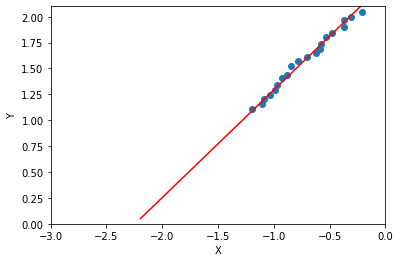

In [144]:
listJ,newX_yLin,preX_yLin,preY_yLin,msr = LinRegUni(0,0,0.55,20,X,Y,10**(-6))
plt.scatter(X,Y)
plt.plot(preX_yLin,preY_yLin, 'r')
plt.xlim(-3, 0)
plt.ylim(0, 2.1)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

Leitura do segundo chute

In [145]:
with open('kick2.dat') as f:
    lines = f.readlines()
    xyz = np.array([[float(line.split()[0]),float(line.split()[1]),float(line.split()[2])] for line in lines])

    X = xyz[:,0]
    Y = xyz[:,1]
    Z = xyz[:,2]

Execução para o segundo chute

Alpha = 0.05: MSR Lin= 0.001133, Iter= 1591
Alpha = 0.17: MSR Lin= 0.000523, Iter= 608
Alpha = 0.30: MSR Lin= 0.000420, Iter= 394
Alpha = 0.42: MSR Lin= 0.000380, Iter= 295
Alpha = 0.55: MSR Lin= 0.000357, Iter= 238


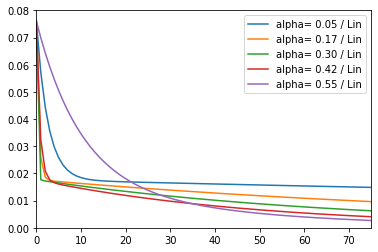

Alpha = 0.05: MSR Pol= 0.000543, Iter= 456
Alpha = 0.07: MSR Pol= 0.000492, Iter= 325
Alpha = 0.10: MSR Pol= 0.000467, Iter= 255
Alpha = 0.12: MSR Pol= 0.000451, Iter= 211
Alpha = 0.15: MSR Pol= 0.000440, Iter= 181


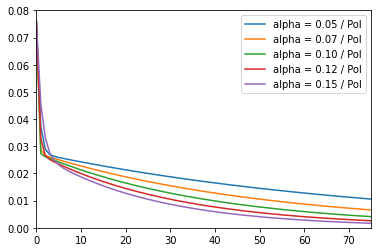

In [146]:
for alpha in np.linspace(0.05, 0.55, 5):
    listJ,newX_yLin,preX_yLin,preY_yLin,msr = LinRegUni(0,0,alpha,20,X,Y,10**(-6))

    print("Alpha = {:.2f}: MSR Lin= {:.6f}, Iter= {}".format(alpha, msr, len(listJ)))

    plt.plot(np.arange(len(listJ)), listJ, label= 'alpha= {:.2f} / Lin'.format(alpha))
    plt.legend()

plt.xlim(0, 75)
plt.ylim(0, 0.08)
plt.show()

for alpha in np.linspace(0.05, 0.15, 5):
        
    listJ,newX_yPol,preX_yPol,preY_yPol,msr = PolRegUni(0,0,0,alpha,20,X,Y,10**(-6))

    print("Alpha = {:.2f}: MSR Pol= {:.6f}, Iter= {}".format(alpha, msr, len(listJ)))

    plt.plot(np.arange(len(listJ)), listJ, label= 'alpha = {:.2f} / Pol'.format(alpha))
    plt.legend()
    

plt.xlim(0, 75)
plt.ylim(0, 0.08)
plt.show()

Verifica-se que assim como no kick1, adotamos a regressão linear com alpha = 0.55 como a mais adequada.

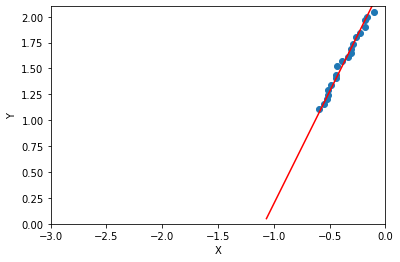

In [147]:
listJ,newX_yLin,preX_yLin,preY_yLin,msr = LinRegUni(0,0,0.55,20,X,Y,10**(-6))
plt.scatter(X,Y)
plt.plot(preX_yLin,preY_yLin, 'r')
plt.xlim(-3, 0)
plt.ylim(0, 2.1)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

# Regressão Linear Multivariada

Iremos agora calcular Z em função de Y e X estimado pela regressão anterior.

Utilizaremos:

## Hipótese 
## $h_{\theta}(x,y) = z = \theta_0 + \theta_1 x + \theta_2 y$

## Função de Custo 
## $J(\theta) = \frac{1}{2m} \sum^m_{i=1} (h_{\theta} - z)^2 $

## Derivadas  
## $ \frac{\partial}{\partial \theta_0} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times 1 $  
## $ \frac{\partial}{\partial \theta_1} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times x $  
## $ \frac{\partial}{\partial \theta_2} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times y $

## Atualização dos $\theta$
## $\theta_{0} := \theta_{0} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times 1 $  
## $\theta_{1} := \theta_{1} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times x $ 
## $\theta_{2} := \theta_{2} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times y $

In [ ]:
def LinRegMult(t0A,t1A,t2A,alpha,m,X,Y,Z,Jep):

    def h(t0,t1,t2,x,y):
        z = t0 + t1*x + t2*y
        return z

    def Cost(t0,t1,t2,X,Y,Z,m):
        soma = 0
        for i in range(m):
            soma += (h(t0,t1,t2,X[i],Y[i]) - Z[i])**2
        value = (1/(2*m)) * soma
        return value

    jA = Cost(t0A,t1A,t2A,X,Y,Z,m)

    listJ = [jA]
    delJ = Jep +1

    while(delJ > Jep):

        soma = 0
        for i in range(m):
            soma += (h(t0A,t1A,t2A,X[i],Y[i]) - Z[i]) * 1
        t0N = t0A - (alpha/m) * soma

        soma = 0
        for i in range(m):
            soma += (h(t0A,t1A,t2A,X[i],Y[i]) - Z[i]) * X[i]
        t1N = t1A - (alpha/m) * soma

        soma = 0
        for i in range(m):
            soma += (h(t0A,t1A,t2A,X[i],Y[i]) - Z[i]) * Y[i]
        t2N = t2A - (alpha/m) * soma

        jN = Cost(t0N,t1N,t2N,X,Y,Z,m)
        listJ.append(jN)

        delJ = abs(jN-jA)

        t0A = t0N
        t1A = t1N
        t2A = t2N
        jA = jN

    newZ = []
    for i in range(m):
        newZ.append(h(t0N,t1N,t2N,X[i],Y[i]))  

    listJNot,newXNot,preX,preY,msrNot = LinRegUni(0,0,0.55,20,X,Y,10**(-6))

    preZ = []
    for i in range(len(preX)):
        preZ.append(h(t0N,t1N,t2N,preX[i],preY[i]))

    soma = 0
    for j in range(m):
        soma += (newZ[j] - Z[j])**2
    msr = soma/m
 
    return listJ,newZ,preX,preY,preZ,msr

# Regressão Polinomial Multivariada

## Hipótese
## $h_{\theta}(x,y) = z = \theta_0 + \theta_1 x + \theta_2 y + \theta_3 xy + \theta_4 x^2 + \theta_5 y^2$


## Função de Custo 
## $J(\theta) = \frac{1}{2m} \sum^m_{i=1} (h_{\theta} - z)^2 $


## Derivadas  
## $ \frac{\partial}{\partial \theta_0} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times 1 $ 
## $ \frac{\partial}{\partial \theta_1} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times x $
## $ \frac{\partial}{\partial \theta_2} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times y $
## $ \frac{\partial}{\partial \theta_3} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times xy $
## $ \frac{\partial}{\partial \theta_4} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times x^2 $
## $ \frac{\partial}{\partial \theta_5} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times y^2 $


## Atualização dos $\theta$ 
## $\theta_{0} := \theta_{0} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times 1 $ 
## $\theta_{1} := \theta_{1} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times x $ 
## $\theta_{2} := \theta_{2} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times y $
## $\theta_{3} := \theta_{3} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times xy $
## $\theta_{4} := \theta_{4} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times x^2 $
## $\theta_{5} := \theta_{5} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times y^2 $

In [ ]:
def PolRegMult2(t0A,t1A,t2A,t3A,t4A,t5A,alpha,m,X,Y,Z,Jep):

    def h(t0,t1,t2,t3,t4,t5,x,y):
        z = t0 + t1*x + t2*y + t3 *x*y + t4 * x**2 + t5 * y**2
        return z

    def Cost(t0,t1,t2,t3,t4,t5,X,Y,Z,m):
        soma = 0
        for i in range(m):
            soma += (h(t0,t1,t2,t3,t4,t5,X[i],Y[i]) - Z[i])**2
        value = (1/(2*m)) * soma
        return value

    jA = Cost(t0A,t1A,t2A,t3A,t4A,t5A,X,Y,Z,m)

    listJ = [jA]
    delJ = Jep +1

    while(delJ > Jep):

        soma = 0
        for i in range(m):
            soma += (h(t0A,t1A,t2A,t3A,t4A,t5A,X[i],Y[i]) - Z[i]) * 1
        t0N = t0A - (alpha/m) * soma

        soma = 0
        for i in range(m):
            soma += (h(t0A,t1A,t2A,t3A,t4A,t5A,X[i],Y[i]) - Z[i]) * X[i]
        t1N = t1A - (alpha/m) * soma

        soma = 0
        for i in range(m):
            soma += (h(t0A,t1A,t2A,t3A,t4A,t5A,X[i],Y[i]) - Z[i]) * Y[i]
        t2N = t2A - (alpha/m) * soma

        soma = 0
        for i in range(m):
            soma += (h(t0A,t1A,t2A,t3A,t4A,t5A,X[i],Y[i]) - Z[i]) * ( X[i] * Y[i])
        t3N = t3A - (alpha/m) * soma

        soma = 0
        for i in range(m):
            soma += (h(t0A,t1A,t2A,t3A,t4A,t5A,X[i],Y[i]) - Z[i]) * X[i]**2
        t4N = t4A - (alpha/m) * soma

        soma = 0
        for i in range(m):
            soma += (h(t0A,t1A,t2A,t3A,t4A,t5A,X[i],Y[i]) - Z[i]) * Y[i]**2
        t5N = t5A - (alpha/m) * soma


        jN = Cost(t0N,t1N,t2N,t3N,t4N,t5N,X,Y,Z,m)
        listJ.append(jN)

        delJ = abs(jN-jA)

        t0A = t0N
        t1A = t1N
        t2A = t2N
        t3A = t3N
        t4A = t4N
        t5A = t5N
        jA = jN

    newZ = []
    for i in range(m):
        newZ.append(h(t0N,t1N,t2N,t3N,t4N,t5N,X[i],Y[i]))

    soma = 0
    for j in range(m):
        soma += (newZ[j] - Z[j])**2
    msr = soma/m

    listJNot,newXNot,preX,preY,msrNot = LinRegUni(0,0,0.55,20,X,Y,10**(-6))

    preZ = []
    for i in range(len(preX)):
        preZ.append(h(t0N,t1N,t2N,t3N,t4N,t5N,preX[i],preY[i]))

    return listJ,newZ,preX,preY,preZ,msr